# PROJETO 1 - Ciência dos Dados
 ## Ellen Beatriz Shen | 2B Engenharia

 ___

## Perguntas a serem respondidas:

**Pergunta 1:** É possível constatar que o "PIB per capita" da Espanha, em relação a países similares a ele, foi aumentado ao entrar na União Europeia? Podemos dizer que ocorreu uma evolução relativa melhor?


## Explicação da hipótese e mecanismo

A **União Europeia** é um bloco econômico e político constituido por 28 países europeus. Seus objetivos são ajudar os países-membros no seu desenvolvimento econômico, dar mais igualdade política e econômica à Europa, melhorar as condições econômicas e de trabalho dos cidadãos europeus, reduzir as desigualdades econômicas e sociais entre todas as regiões que compõem o bloco, garantir a permanência de um ambiente pacífico e harmonioso em toda a Europa. Suas características são livre circulação das pessoas pelos Estados-membros, livre circulação de mercadorias entre os Estados-membros, integração política, adoção de uma moeda única, o Euro.

- Como um dos objetivos principais da UE é o desenvolvimento econômico de seus países-membros, a hipótese busca comparar os dados de países pertencentes e não pertencentes a este bloco econômico. A análise vai ser baseada em um grupo de países que são economicamente similares, e que somente alguns entraram para a UE. Assim podemos utilizar variáveis como o 'PIB per capita' ao longo dos anos para a comparação.

## Bases de dados utilizadas

- dados retirados de https://www.gapminder.org/data/
- Variáveis:
 - PIB per capita
 - Renda


___

## Análise dos Dados 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Leitura dos Dados
PIB = pd.read_excel('gdp_per_capita_yearly_growth.xlsx')
renda = pd.read_excel('income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')
mundo = pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_126307.xls', sheet_name="Data", skiprows=3)

In [3]:
#Trocando o indice dos dados.
dados_PIB = PIB.set_index("country")
dados_renda = renda.set_index("country")
PIB_mundo_sujo = mundo.set_index("Country Name")
PIB_mundo = PIB_mundo_sujo.iloc[:,3:59]

In [4]:
#Trocando o indice dos dados.
dados_pib = PIB.set_index("country")
dados_r = renda.set_index("country")

dados_PIB = dados_pib.iloc[:,161:219]
dados_renda = dados_r.iloc[:,161:219]

In [5]:
europa = ['Andorra',  'Austria', 'Belgium', 'Bulgaria', 'Bosnia and Herzegovina',  'Cyprus',  'Czech Republic','Denmark', 'Spain',  'Estonia', 'Finland',  'France', 'United Kingdom',  'Greece', 'Croatia', 'Hungary', 'Ireland',  'Iceland',  'Italy',  'Lithuania', 'Latvia',  'Monaco',  'Moldova', 'Malta',  'Montenegro', 'Netherlands',  'Poland',  'Portugal',  'Romania',  'Slovak Republic', 'Slovenia',  'Sweden',  'Turkey', 'Luxembourg', 'Germany']
uniao_europeia = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']


### PIB Espanha

In [6]:
PIB_espanha = dados_PIB.loc["Spain",:]

#Filtro do PIB antes e depois de 1986
PIB_espanha_antes = PIB_espanha[(PIB_espanha.index>1962) & (PIB_espanha.index<1986)]
PIB_espanha_depois = PIB_espanha[(PIB_espanha.index>1986)]

- Gráfico do PIB da Espanha antes de 1986:


Text(0, 0.5, 'PIB Espanha')

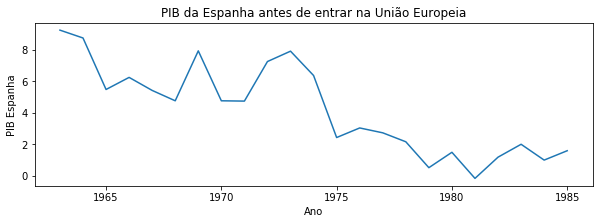

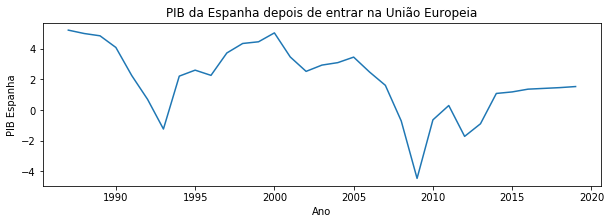

In [50]:
print("- Gráfico do PIB da Espanha antes de 1986:")

plt.figure(figsize=(10,3))
plt.plot(PIB_espanha_antes.index,PIB_espanha_antes)
plt.title('PIB da Espanha antes de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('PIB Espanha')

plt.figure(figsize=(10,3))
plt.plot(PIB_espanha_depois.index,PIB_espanha_depois)
plt.title('PIB da Espanha depois de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('PIB Espanha')

- Gráfico comparando as médias do PIB per capita antes e depois:

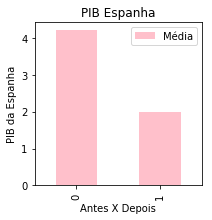

In [9]:
#Médias antes e depois
media_PIB_antes = PIB_espanha_antes.mean()
media_PIB_depois = PIB_espanha_depois.mean()

dados_comparacao_PIB = {'Época': ['Antes', 'Depois'],'Média': [media_PIB_antes,media_PIB_depois]}
media_PIB_espanha = pd.DataFrame(dados_comparacao_PIB, columns=['Época', 'Média'])

plot = media_PIB_espanha.plot(kind='bar',title='PIB Espanha',figsize=(3, 3),color=('pink'))
plt.ylabel('PIB da Espanha')
plt.xlabel('Antes X Depois')
plt.show()

Comparar a média não é o melhor método para analisar ...

Ajuste linear entre:
Coeficiente linear: 708.0862450592886
Coeficiente angular: -0.3565750988142293
Ajuste linear entre:
Coeficiente linear: 247.88180269607844
Coeficiente angular: -0.12276905080213904


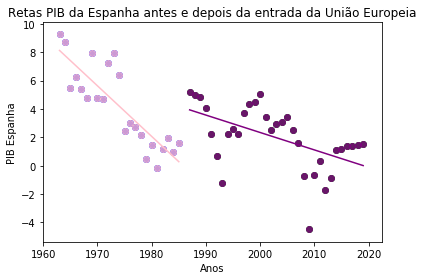

In [10]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Retas PIB da Espanha antes e depois da entrada da União Europeia')
    plt.xlabel('Anos')
    plt.ylabel('PIB Espanha')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()
    
index_antes = PIB_espanha_antes.reset_index()
index_depois = PIB_espanha_depois.reset_index()

plt.scatter(index_antes["index"], index_antes.Spain, color="b")
reta(index_antes["index"], index_antes.Spain, "pink")
plt.scatter(index_depois["index"], index_depois.Spain, color="g")
reta(index_depois["index"], index_depois.Spain, "purple")

### Renda Espanha

In [11]:
renda_espanha = dados_renda.loc["Spain",:]
#Filtro do PIB antes e depois de 1986
renda_espanha_antes = renda_espanha[(renda_espanha.index>1962) & (renda_espanha.index<1986)]
renda_espanha_depois = renda_espanha[(renda_espanha.index>1986)]

- Gráfico da Renda da Espanha antes de 1986:

Text(0, 0.5, 'Renda Espanha')

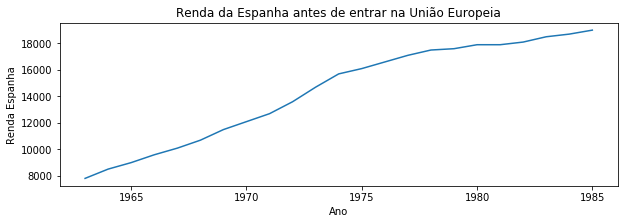

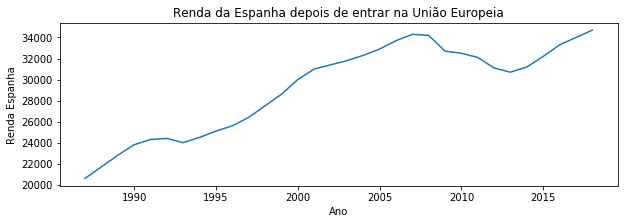

In [47]:
plt.figure(figsize=(10,3))
plt.plot(renda_espanha_antes.index, renda_espanha_antes)
plt.title('Renda da Espanha antes de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('Renda Espanha')

plt.figure(figsize=(10,3))
plt.plot(renda_espanha_depois.index, renda_espanha_depois)
plt.title('Renda da Espanha depois de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('Renda Espanha')

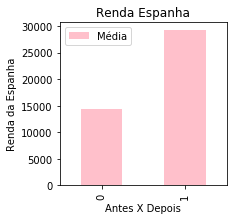

In [14]:
#Médias antes e depois
media_renda_antes = renda_espanha_antes.mean()
media_renda_depois = renda_espanha_depois.mean()

dados_comparacao_renda = {'Época': ['Antes', 'Depois'],'Média': [media_renda_antes, media_renda_depois]}
media_renda_espanha = pd.DataFrame(dados_comparacao_renda, columns=['Época', 'Média'])

plot = media_renda_espanha.plot(kind='bar',title='Renda Espanha',figsize=(3, 3),color=('pink'))
plt.ylabel('Renda da Espanha')
plt.xlabel('Antes X Depois')
plt.show()

Ajuste linear entre:
Coeficiente linear: -1055877.3320158103
Coeficiente angular: 542.1837944664032
Ajuste linear entre:
Coeficiente linear: -795552.1077712611
Coeficiente angular: 411.87683284457484


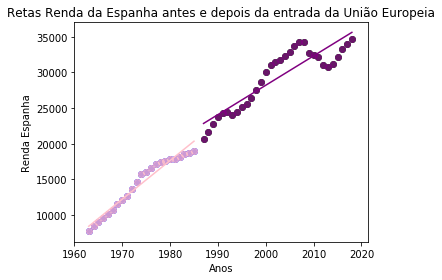

In [15]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Retas Renda da Espanha antes e depois da entrada da União Europeia')
    plt.xlabel('Anos')
    plt.ylabel('Renda Espanha')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()
    
index_renda_antes = renda_espanha_antes.reset_index()
index_renda_depois = renda_espanha_depois.reset_index()

plt.scatter(index_renda_antes["index"], index_renda_antes.Spain, color="b")
reta(index_renda_antes["index"], index_renda_antes.Spain, "pink")
plt.scatter(index_renda_depois["index"], index_renda_depois.Spain, color="g")
reta(index_renda_depois["index"], index_renda_depois.Spain, "purple")

### PIB Europa e União Europeia

In [16]:
#Criando uma coluna "Europa" para caso o páis pertencer ou não ao continente europeu.
dataframe_pib_europa = dados_PIB.loc[:,"Europa"] = "não"
dataframe_pib_europa = dados_PIB.loc[europa, "Europa"] = "sim"

#Filtro do PIB dos países da Europa
PIB_europa = dados_PIB.loc[dados_PIB.Europa=="sim",:]



/Users/ellenbeatriz/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ellenbeatriz/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
#Criando uma coluna "União Europria" para caso o páis pertencer ou não ao bloco econômico.
dataframe_pib_UE = PIB_europa.loc[:,"União Europeia"] = "não"
dataframe_pib_UE = PIB_europa.loc[uniao_europeia, "União Europeia"] = "sim"

#Filtro do PIB dos países pertencentes à União Europeia
PIB_UE = PIB_europa.loc[PIB_europa["União Europeia"]=="sim",:]


### Renda Europa e União Europeia

In [18]:
#Criando uma coluna "Europa" para caso o páis pertencer ou não ao continente europeu.
dataframe_renda_europa = dados_renda.loc[:,"Europa"] = "não"
dataframe_renda_europa =  dados_renda.loc[europa, "Europa"] = "sim"

#Filtro da Renda dos países da Europa
renda_europa = dados_renda.loc[dados_renda.Europa=="sim",:]

In [19]:
#Criando uma coluna "União Europria" para caso o páis pertencer ou não ao bloco econômico.
dataframe_renda_UE = renda_europa.loc[:,"União Europeia"] = "não"
dataframe_renda_UE = renda_europa.loc[uniao_europeia, "União Europeia"] = "sim"

#Filtro da Renda dos países pertencentes à União Europeia
renda_UE = renda_europa.loc[renda_europa["União Europeia"]=="sim",:]

In [20]:
PIB_nao_pertencentes = PIB_europa.loc[PIB_europa["União Europeia"]=="não",:]
renda_nao_pertencentes = renda_europa.loc[renda_europa["União Europeia"]=="não",:]

In [21]:
descricao_pib_ue = PIB_UE.describe()
medias_pib_ue = descricao_pib_ue.loc["mean",:]
media_total_pib_ue = medias_pib_ue.mean()

descricao_renda_ue = renda_UE.describe()
medias_renda_ue = descricao_renda_ue.loc["mean",:]
media_total_renda_ue = medias_renda_ue.mean()

descricao_pib_mundo = dados_PIB.describe()
medias_pib_mundo = descricao_pib_mundo.loc["mean",:]
media_total_mundo = medias_pib_mundo.mean()

Text(0, 0.5, 'Renda União Europeia')

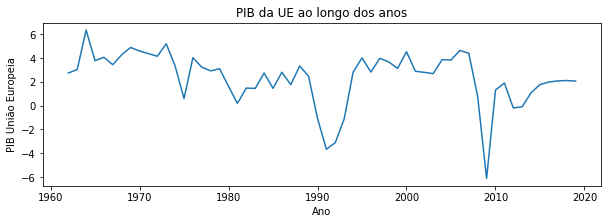

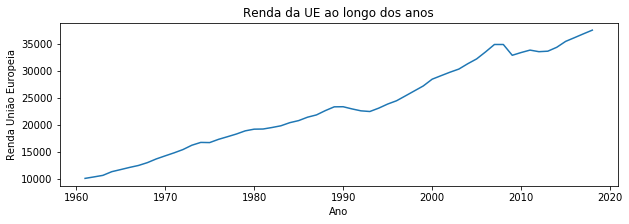

In [49]:
plt.figure(figsize=(10,3))
plt.plot(medias_pib_ue.index, medias_pib_ue)
plt.title('PIB da UE ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('PIB União Europeia')

plt.figure(figsize=(10,3))
plt.plot(medias_renda_ue.index, medias_renda_ue)
plt.title('Renda da UE ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Renda União Europeia')

In [24]:
dados_comparacao_ue = {'País/Organização': ['Espanha', 'União Europeia'],'Média': [media_PIB_depois,media_total_pib_ue]}

media_espanha_ue = pd.DataFrame(dados_comparacao_ue, columns=['País/Organização', 'Média'])
media_espanha_ue

,País/Organização,Média
0,Espanha,1.975394
1,União Europeia,2.365285


In [25]:
dados_comparacao_ue = {'País/Organização': ['Espanha', 'União Europeia'],'Média': [media_PIB_depois,media_total_renda_ue]}


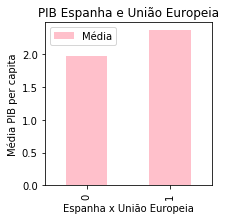

In [26]:
plot = media_espanha_ue.plot(kind='bar',title='PIB Espanha e União Europeia',figsize=(3, 3),color=('pink'))
plt.ylabel('Média PIB per capita')
plt.xlabel('Espanha x União Europeia')
plt.show()

In [27]:
# plt.scatter(PIB_espanha.index, PIB_espanha, color="red")
# plt.scatter(medias_pib_ue.index , medias_pib_ue, color="pink")
# plt.title('PIB Espanha x União Europeia')
# plt.xlabel('Ano')
# plt.ylabel('PIB')

Ajuste linear entre:
Coeficiente linear: 92.49366712560915
Coeficiente angular: -0.04527926744461972
Ajuste linear entre:
Coeficiente linear: 226.48180473099748
Coeficiente angular: -0.11226217355193942


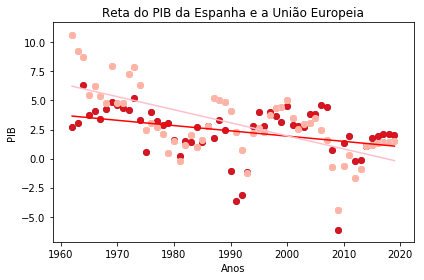

In [42]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Reta do PIB da Espanha e a União Europeia')
    plt.xlabel('Anos')
    plt.ylabel('PIB')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()
    
index_medias_pib_ue = medias_pib_ue.reset_index()
index_pib_espanha= PIB_espanha.reset_index()
index_medias_pib_mundo = medias_pib_mundo.reset_index()

plt.scatter(index_medias_pib_ue["index"] , index_medias_pib_ue["mean"])
reta(index_medias_pib_ue["index"] , index_medias_pib_ue["mean"],"red")

plt.scatter(index_pib_espanha["index"], index_pib_espanha.Spain)
reta(index_pib_espanha["index"], index_pib_espanha.Spain,"pink")



Ajuste linear entre:
Coeficiente linear: 226.48180473099748
Coeficiente angular: -0.11226217355193942
Ajuste linear entre:
Coeficiente linear: 5.144216379518228
Coeficiente angular: -0.001552811529104888


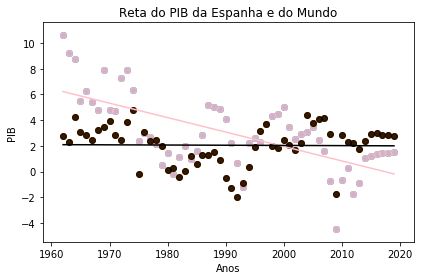

In [44]:
def reta2(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Reta do PIB da Espanha e do Mundo')
    plt.xlabel('Anos')
    plt.ylabel('PIB')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()
    
plt.scatter(index_pib_espanha["index"], index_pib_espanha.Spain)
reta2(index_pib_espanha["index"], index_pib_espanha.Spain,"pink")

plt.scatter(index_medias_pib_mundo["index"] , index_medias_pib_mundo["mean"])
reta2(index_medias_pib_mundo["index"] , index_medias_pib_mundo["mean"],"black")

In [29]:
#PIB mundo

pib_mundo_anos = PIB_mundo.loc[:,('1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018')]

tempo_pib = PIB_mundo.T


/Users/ellenbeatriz/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:870: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_lowerdim(tup)


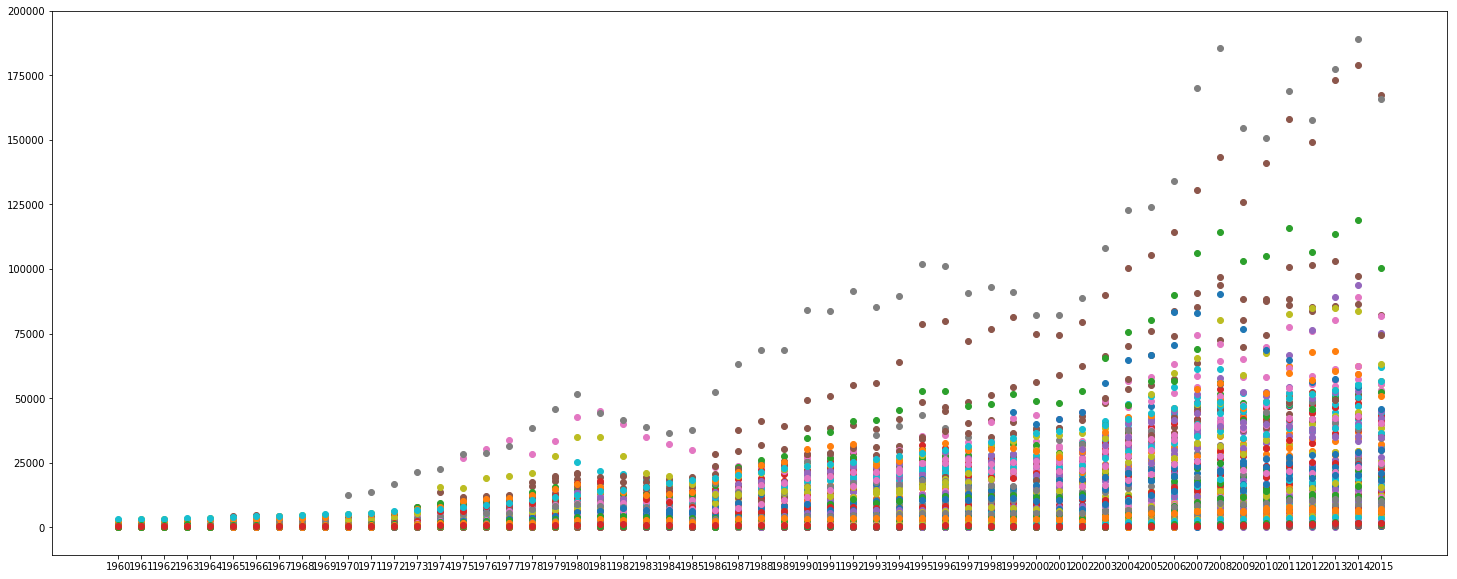

In [30]:
plt.figure(figsize=(25,10))
for pais in tempo_pib.columns:
    plt.scatter(x=tempo_pib.index, y=tempo_pib[pais])


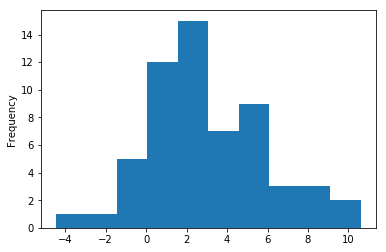

In [38]:
PIB_espanha.isnull().any()
PIB_espanha.plot.hist()

In [39]:
PIB_espanha

1962    10.600
1963     9.260
1964     8.760
1965     5.480
1966     6.250
1967     5.420
1968     4.760
1969     7.940
1970     4.760
1971     4.740
1972     7.260
1973     7.920
1974     6.370
1975     2.420
1976     3.030
1977     2.720
1978     2.150
1979     0.500
1980     1.480
1981    -0.182
1982     1.170
1983     1.990
1984     0.983
1985     1.580
1986     2.840
1987     5.220
1988     5.000
1989     4.850
1990     4.090
1991     2.260
1992     0.705
1993    -1.230
1994     2.220
1995     2.610
1996     2.270
1997     3.730
1998     4.350
1999     4.460
2000     5.040
2001     3.470
2002     2.530
2003     2.940
2004     3.100
2005     3.460
2006     2.490
2007     1.620
2008    -0.700
2009    -4.450
2010    -0.632
2011     0.303
2012    -1.710
2013    -0.888
2014     1.090
2015     1.190
2016     1.370
2017     1.420
2018     1.470
2019     1.540
Name: Spain, dtype: float64